# ***Case Study: Predicting Company Bankruptcy Using Financial Data***

# **Data Understanding and Pre - Processing.**

In [ ]:
# pip install numpy pandas statsmodels matplotlib seaborn
# install required modules

## **Importing Required Libraries for DataFrames and Data-loading**

In [1]:
# import numpy & panda
import pandas as pd
import numpy as np

## **Importing Required Libraries for Plotting.**

In [28]:
# importing matplotlib & seaborn for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Required Libraries for Testing and Modalling.**

In [2]:
# import statsmodels for statistical tests.
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **Uploading dataset on google colab**

In [14]:
from google.colab import files
uploaded=files.upload() # data.csv

# Import os to show current working directory.
import os
os.getcwd()

Saving data.csv to data.csv


'/content'

## **Loading provided dataset (data.csv) as Dataframe using panda library.**

In [15]:
df  = pd.read_csv('data.csv')

## **Getting Details of df -> Dataframe**

In [18]:
df.head(20)
## Getting first 20 rows and all columns of df.

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0           1                                           0.370594          
1           1                                           0.464291          
2           1                                           0.426071          
3           1                                           0.399844          
4           1                                           0.465022          
5           1                                           0.388680          
6           0                                           0.390923          
7           0                                           0.508361          
8           0                                           0.488519          
9           0                                           0.495686          
10          0                                           0.482475          
11          0                                           0.444401          
12          0                                           0.491152          
13          0                                           0.474041          
14          0                                           0.506703          
15          0                                           0.513821          
16          0                                           0.488909          
17          0                                           0.535953          
18          0                                           0.504071          
19          0                                           0.487398          

     ROA(A) before interest and % after tax  \
0                                  0.424389   
1                                  0.538214   
2                                  0.499019   
3                                  0.451265   
4                                  0.538432   
5                                  0.415177   
6                                  0.445704   
7                                  0.570922   
8                                  0.545137   
9                                  0.550916   
10                                 0.567543   
11                                 0.549717   
12                                 0.551570   
13                                 0.533308   
14                                 0.575829   
15                                 0.571086   
16                                 0.560238   
17                                 0.590438   
18                                 0.559802   
19                                 0.543720   

     ROA(B) before interest and depreciation after tax  \
0                                            0.405750    
1                                            0.516730    
2                                            0.472295    
3                                            0.457733    
4                                            0.522298    
5                                            0.419134    
6                                            0.436158    
7                                            0.559077    
8                                            0.543284    
9                                            0.542963    
10                                           0.538198    
11                                           0.498956    
12                                           0.543391    
13                                           0.523690    
14                                           0.569838    
15                                           0.558756    
16                                           0.540286    
17                                           0.580920    
18                                           0.558649    
19                                           0.533647    

     Operating Gross Margin   Realized Sales Gross Margin  \
0                  0.601457                      0.601457   
1                  0.610235                      0.610235   
2                  0.601450           

In [17]:
df.shape
## Getting shape of df.

(6819, 96)

In [19]:
df.size
## Getting size of df.

654624

In [20]:
df.info()
## Getting info about df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### **It not just shows columns info. but it also shows there are no null values in entire df created.**

In [22]:
df.describe()
## Summary Statistics.
## Getting statistical info about df.

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [24]:
df.isnull().sum()
## Getting count of null values in each column.

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

### **It shows there are no null values in entire df.**

In [25]:
df.duplicated().sum()
## Getting count of duplicated values in df.

0

### **It shows there no duplicate values in entire df.**

In [27]:
df.shape

(6819, 96)

## **Observation:**

## 1.   df has 6819 records & 96 columns. Columns includes financial attributes and their bankruptcy status in Bankrupt?.
## 2.   LDatatype are float64 or int64.
## 3.   There is no null or duplicated values.

## **Problem:**

## The target column Bankrupt? is imbalanced, with only 3% of total values is 1, which indicates the bankrupt status.

# **EXPLORATORY DATA ANALYSIS.**

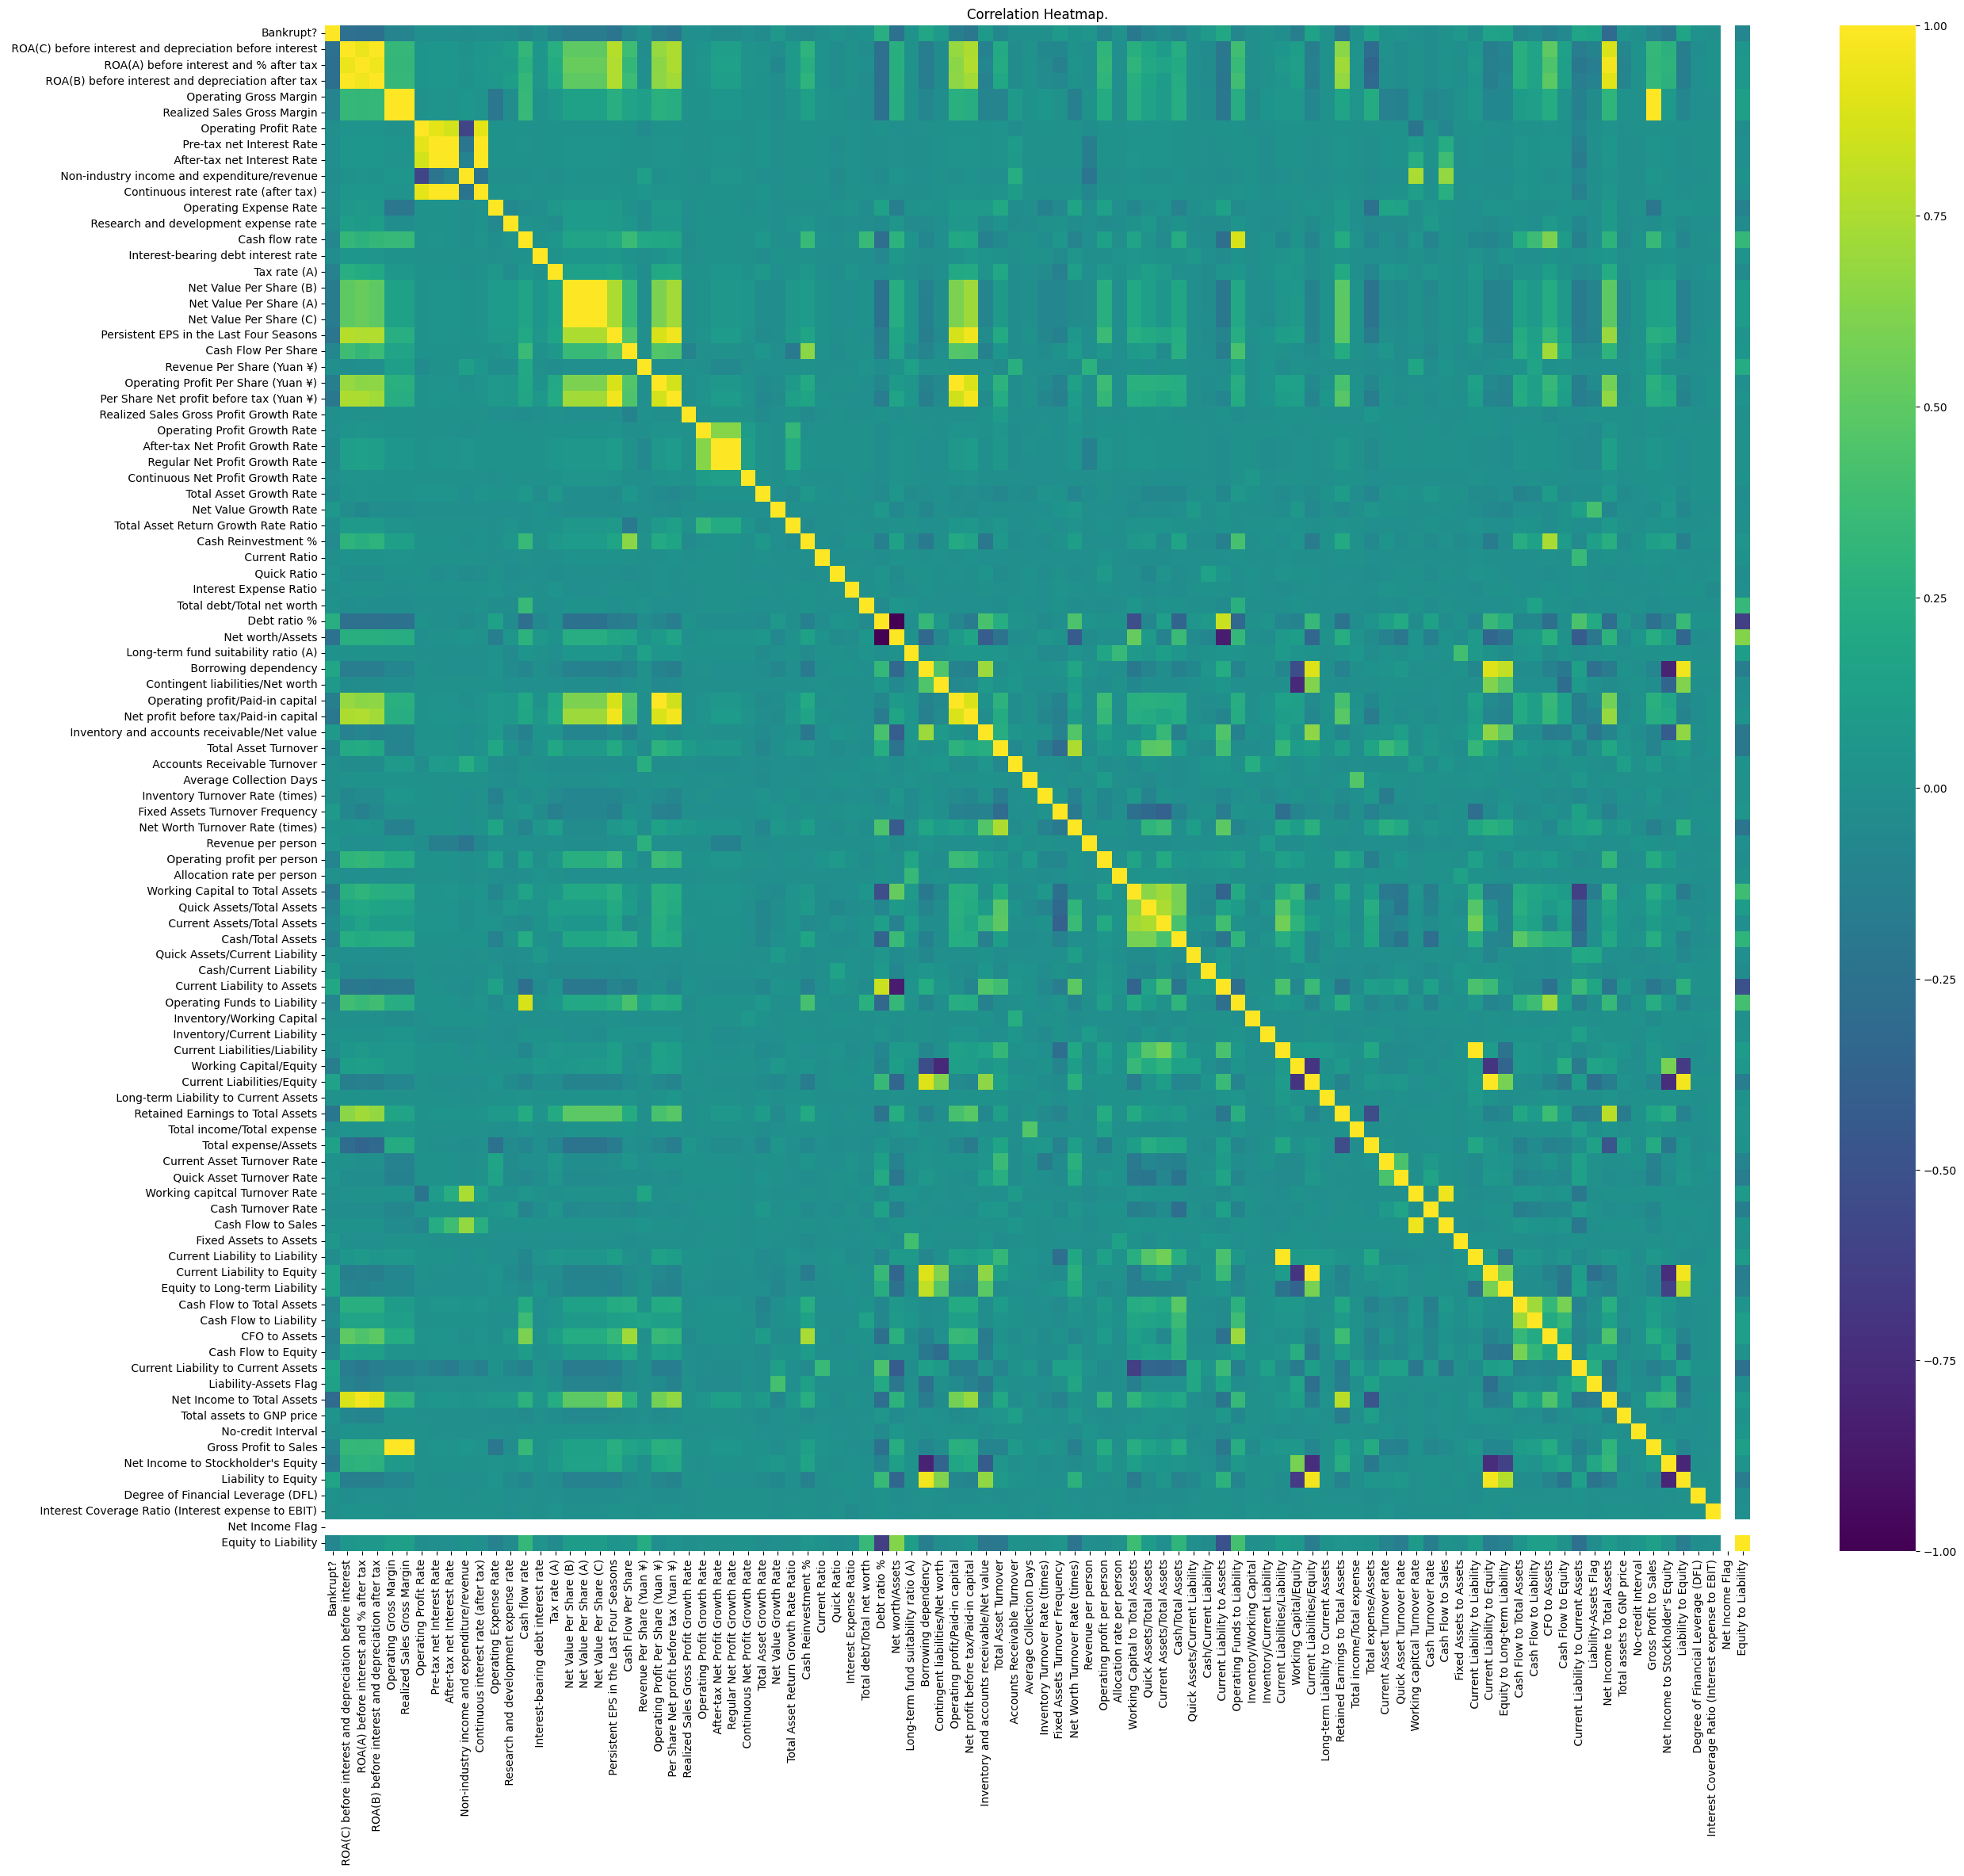

In [41]:
# Check corelations between various features of df using heatmap

# Createing correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(29, 25))
sns.heatmap(corr_matrix, cmap="viridis")
plt.title("Correlation Heatmap.")
plt.show()

In [ ]:
'''
 **Analysis:**

- There are several features that have a strong positive correlation with the target variable "Bankrupt?". These include:
    - Net Income to Total Assets
    - Total Debt to Total Assets
    - Debt to Equity
    - Interest Expense to Total Assets
    - Sales to Total Assets
    - Current Assets to Total Assets
    - Inventory to Total Assets
- There are also several features that have a strong negative correlation with the target variable "Bankrupt?". These include:
    - Return on Assets
    - Return on Equity
    - Gross Profit Margin
    - Operating Profit Margin
    - Net Profit Margin
    - Quick Ratio
    - Current Ratio
- The heatmap also reveals that there are several features that are highly correlated with each other. For example:
    - Total Debt to Total Assets and Debt to Equity
    - Sales to Total Assets and Current Assets to Total Assets
    - Inventory to Total Assets and Current Assets to Total Assets

**Recommendations:**

- Given the strong correlations between several features and the target variable, it is important to carefully select the features that will be used to train a predictive model. Including too many highly correlated features can lead to overfitting and poor model performance.
- It may also be beneficial to consider using dimensionality reduction techniques, such as principal component analysis (PCA), to reduce the number of features and avoid overfitting.

**Insights:**

- The heatmap provides valuable insights into the relationships between the different features in the dataset. This information can be used to:
    - Identify potential risk factors for bankruptcy.
    - Develop early warning systems for bankruptcy.
    - Improve the accuracy of predictive models for bankruptcy.
'''

## **Detecting Outliers from df.**

### **With Outliers.**

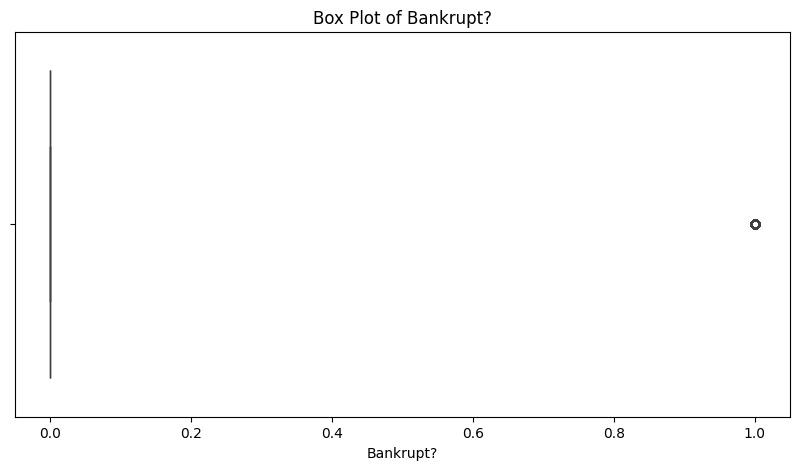

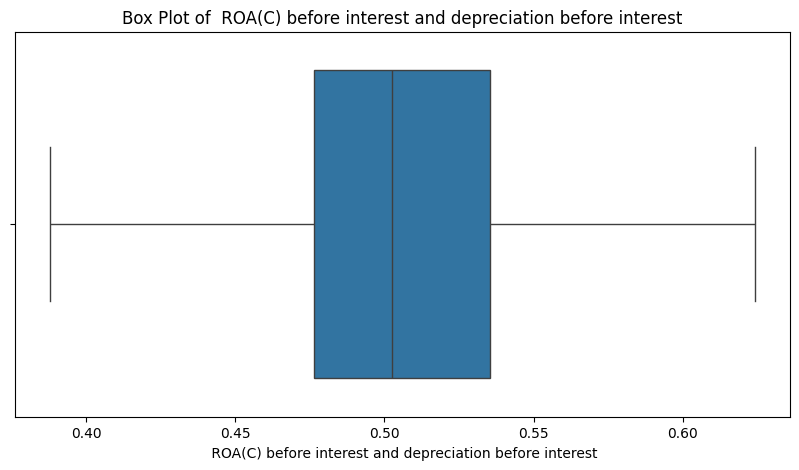

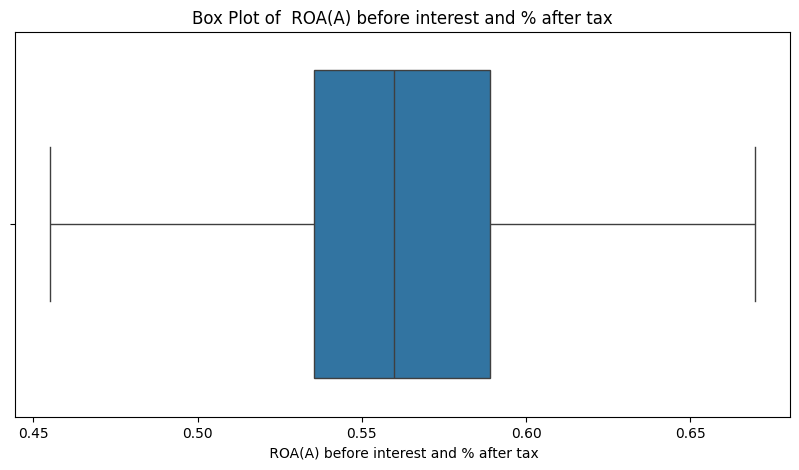

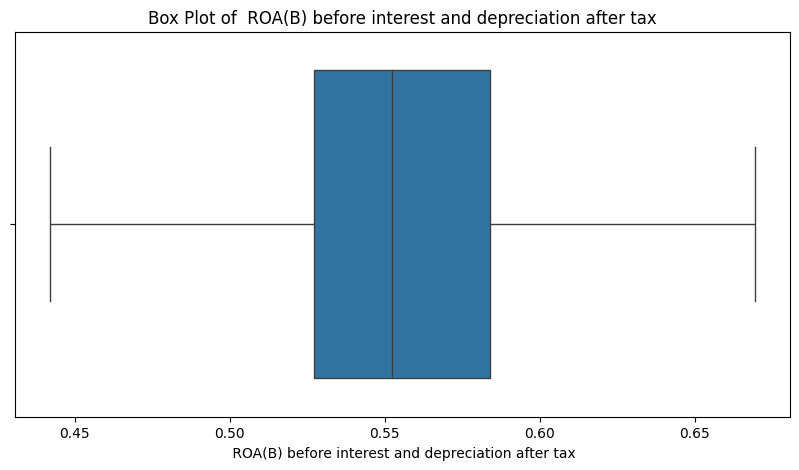

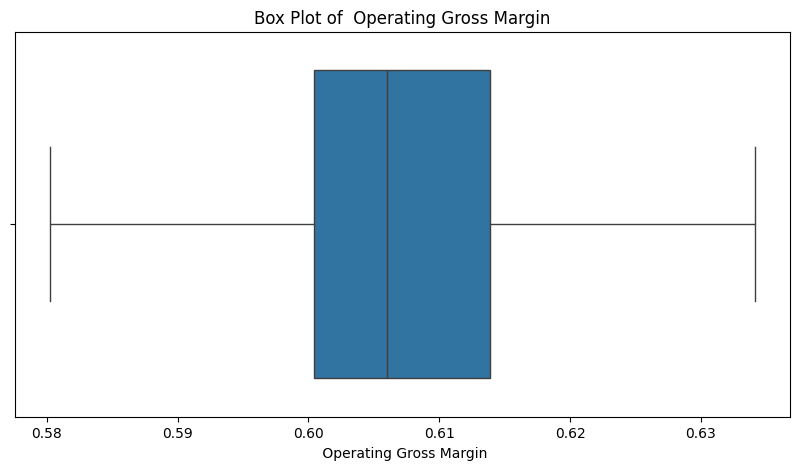

In [110]:
# Detect outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize outliers for a few selected features using box plots
selected_features = df.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

### **Without Outliers.**

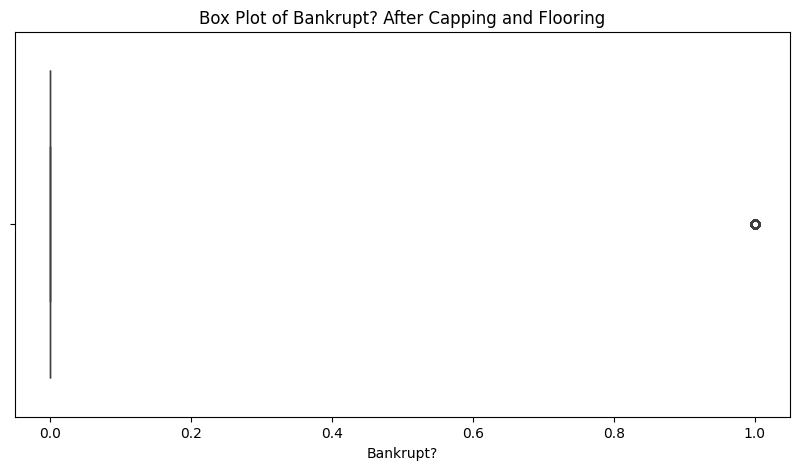

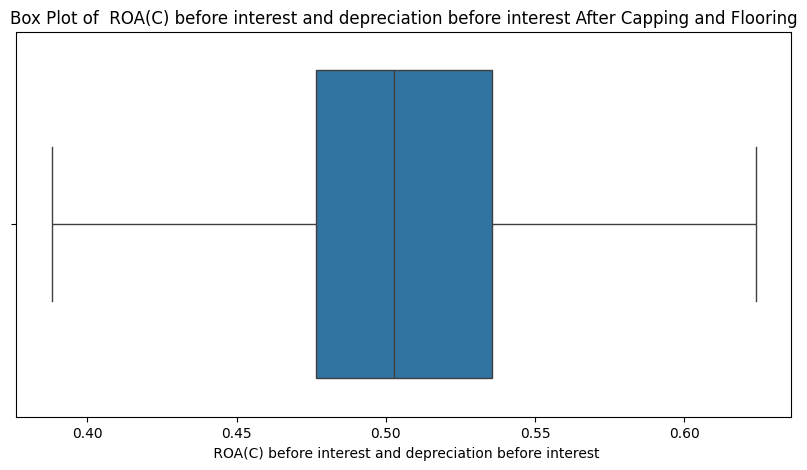

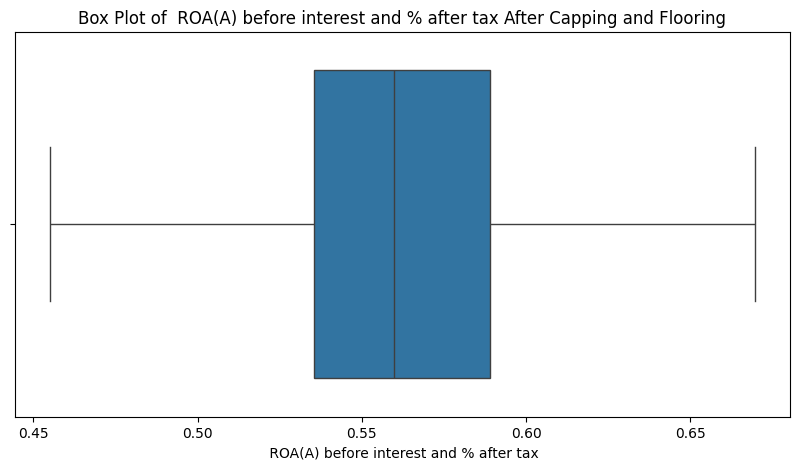

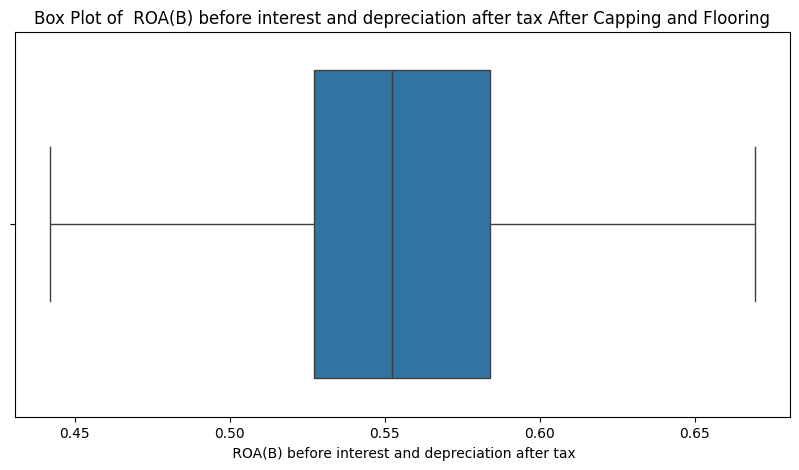

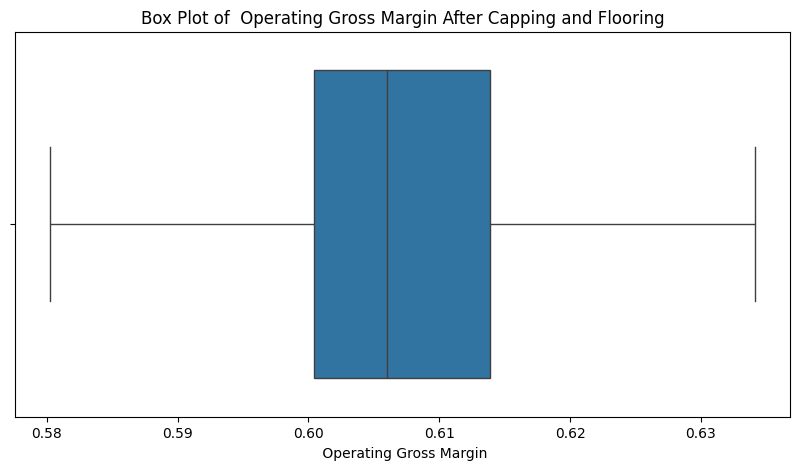

In [113]:
# Cap and floor outliers
for column in df.columns:
    if df[column].dtype != 'object' and column != 'Bankrupt?':
        df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])

# Verify that outliers have been capped and floored
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} After Capping and Flooring')
    plt.show()

In [ ]:
'''
-------------------------- **Problem:** Imbalanced dataset, Feature Selection and Outliers.

**Solution:**
Choose Random Forest model:

For imbalanced data: Diverse trees and result voting helps this model reducing bias towards majority class.
For feature selection: Random features selection and feature importance scores helps this model identify informative features and remove irrelevant ones.
For outliers: Result voting among trees makes this model less sensitive to outliers.

**Capping:** Replace outliers with the maximum or minimum value of the feature.
**Flooring:** Replace outliers with the median or mean of the feature.
'''

In [108]:
# Check for remaining outliers
outliers_after = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers in each feature after capping and flooring:\n", outliers_after)

# Generate descriptive statistics
df.describe()

Number of outliers in each feature after capping and flooring:
 Bankrupt?                                                   220
 ROA(C) before interest and depreciation before interest      0
 ROA(A) before interest and % after tax                       0
 ROA(B) before interest and depreciation after tax            0
 Operating Gross Margin                                       0
                                                           ... 
 Liability to Equity                                          0
 Degree of Financial Leverage (DFL)                           0
 Interest Coverage Ratio (Interest expense to EBIT)           0
 Net Income Flag                                              0
 Equity to Liability                                          0
Length: 96, dtype: int64


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505667          
std       0.176710                                           0.051483          
min       0.000000                                           0.387973          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           0.624116          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.560507   
std                                   0.050087   
min                                   0.455122   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   0.669579   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.554691    
std                                             0.050277    
min                                             0.442034    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             0.669348    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607834                      0.607812   
std                   0.010758                      0.010725   
min                   0.580240                      0.580321   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   0.634118                      0.633954   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.999028                    0.797467   
std                  0.000120                    0.000189   
min                  0.998781                    0.797096   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  0.999282                    0.797868   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809378   
std                        0.000157   
min                        0.809075   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        0.809706   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303526  ...   
std                                        0.000124  ...   
min                                        0.303288  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        0.303764  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                 6819.000000   
mean                      0.810070                    0.003750   
std                       0.027735                    0.003805   
min

<ipython-input-190-65d6c555c559>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=df, palette=palette)


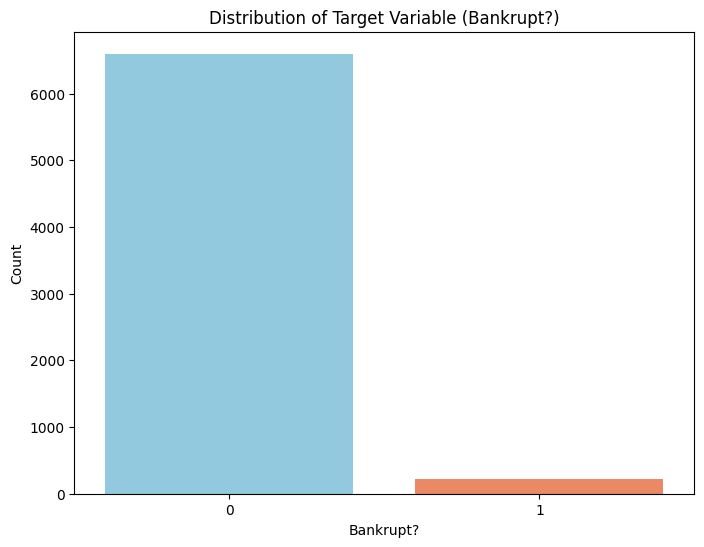

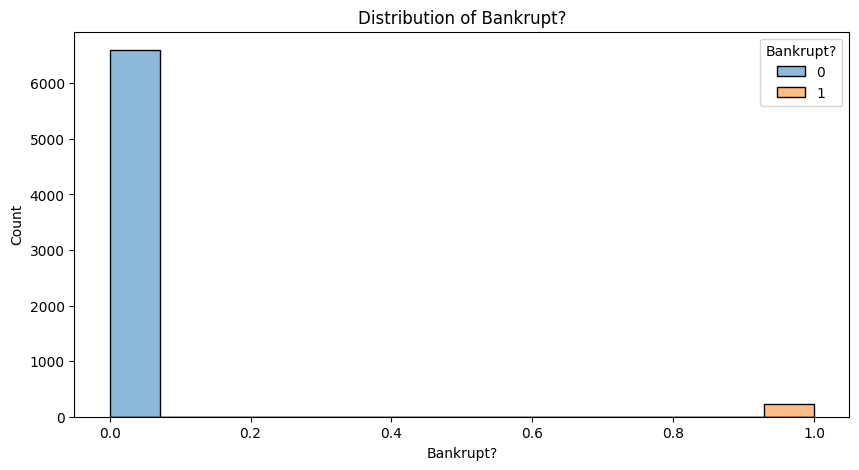

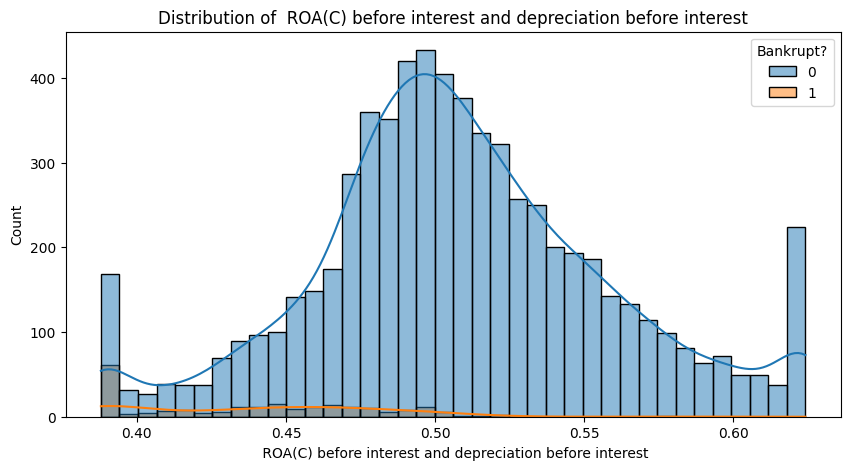

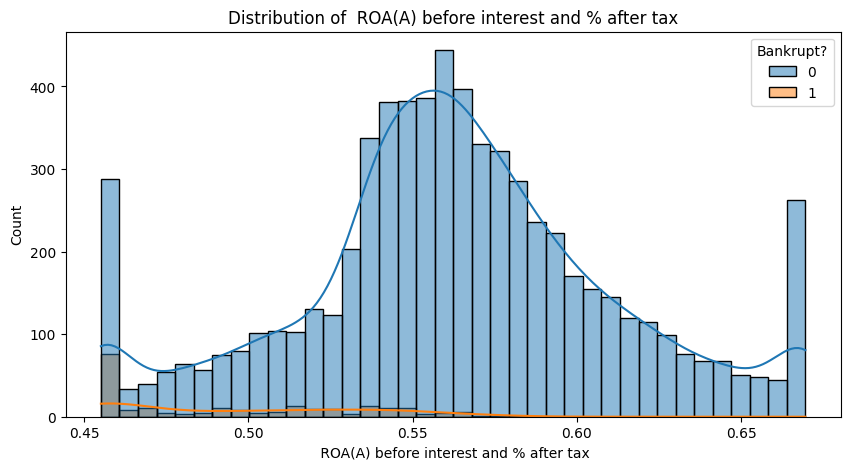

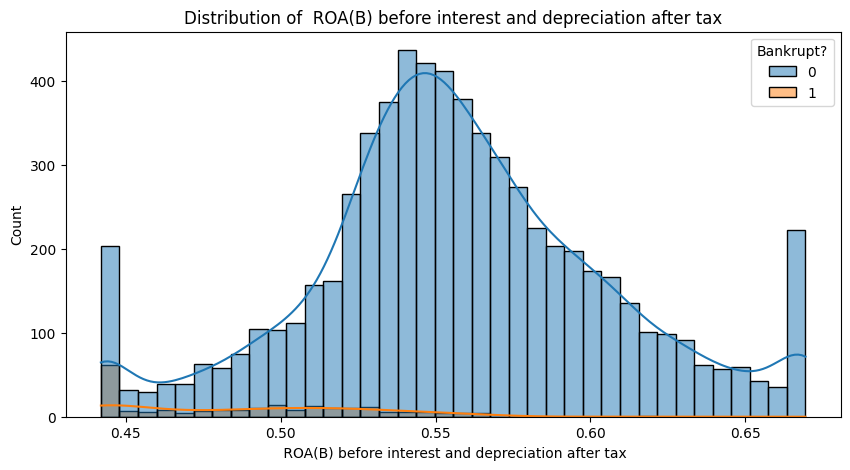

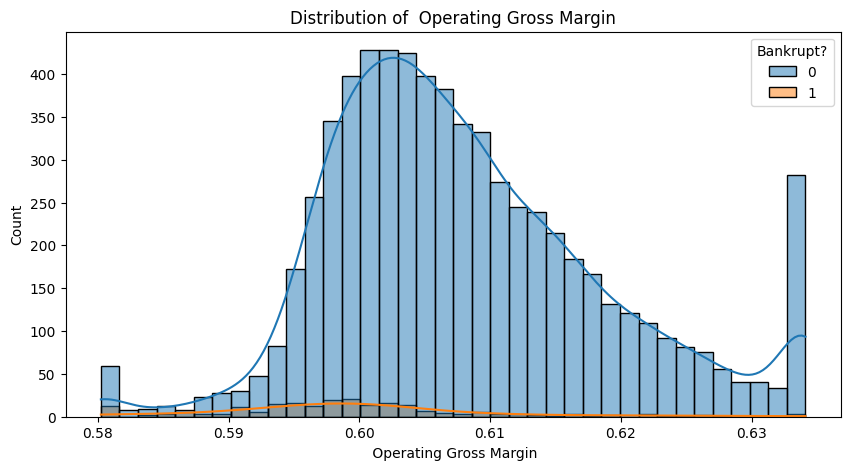

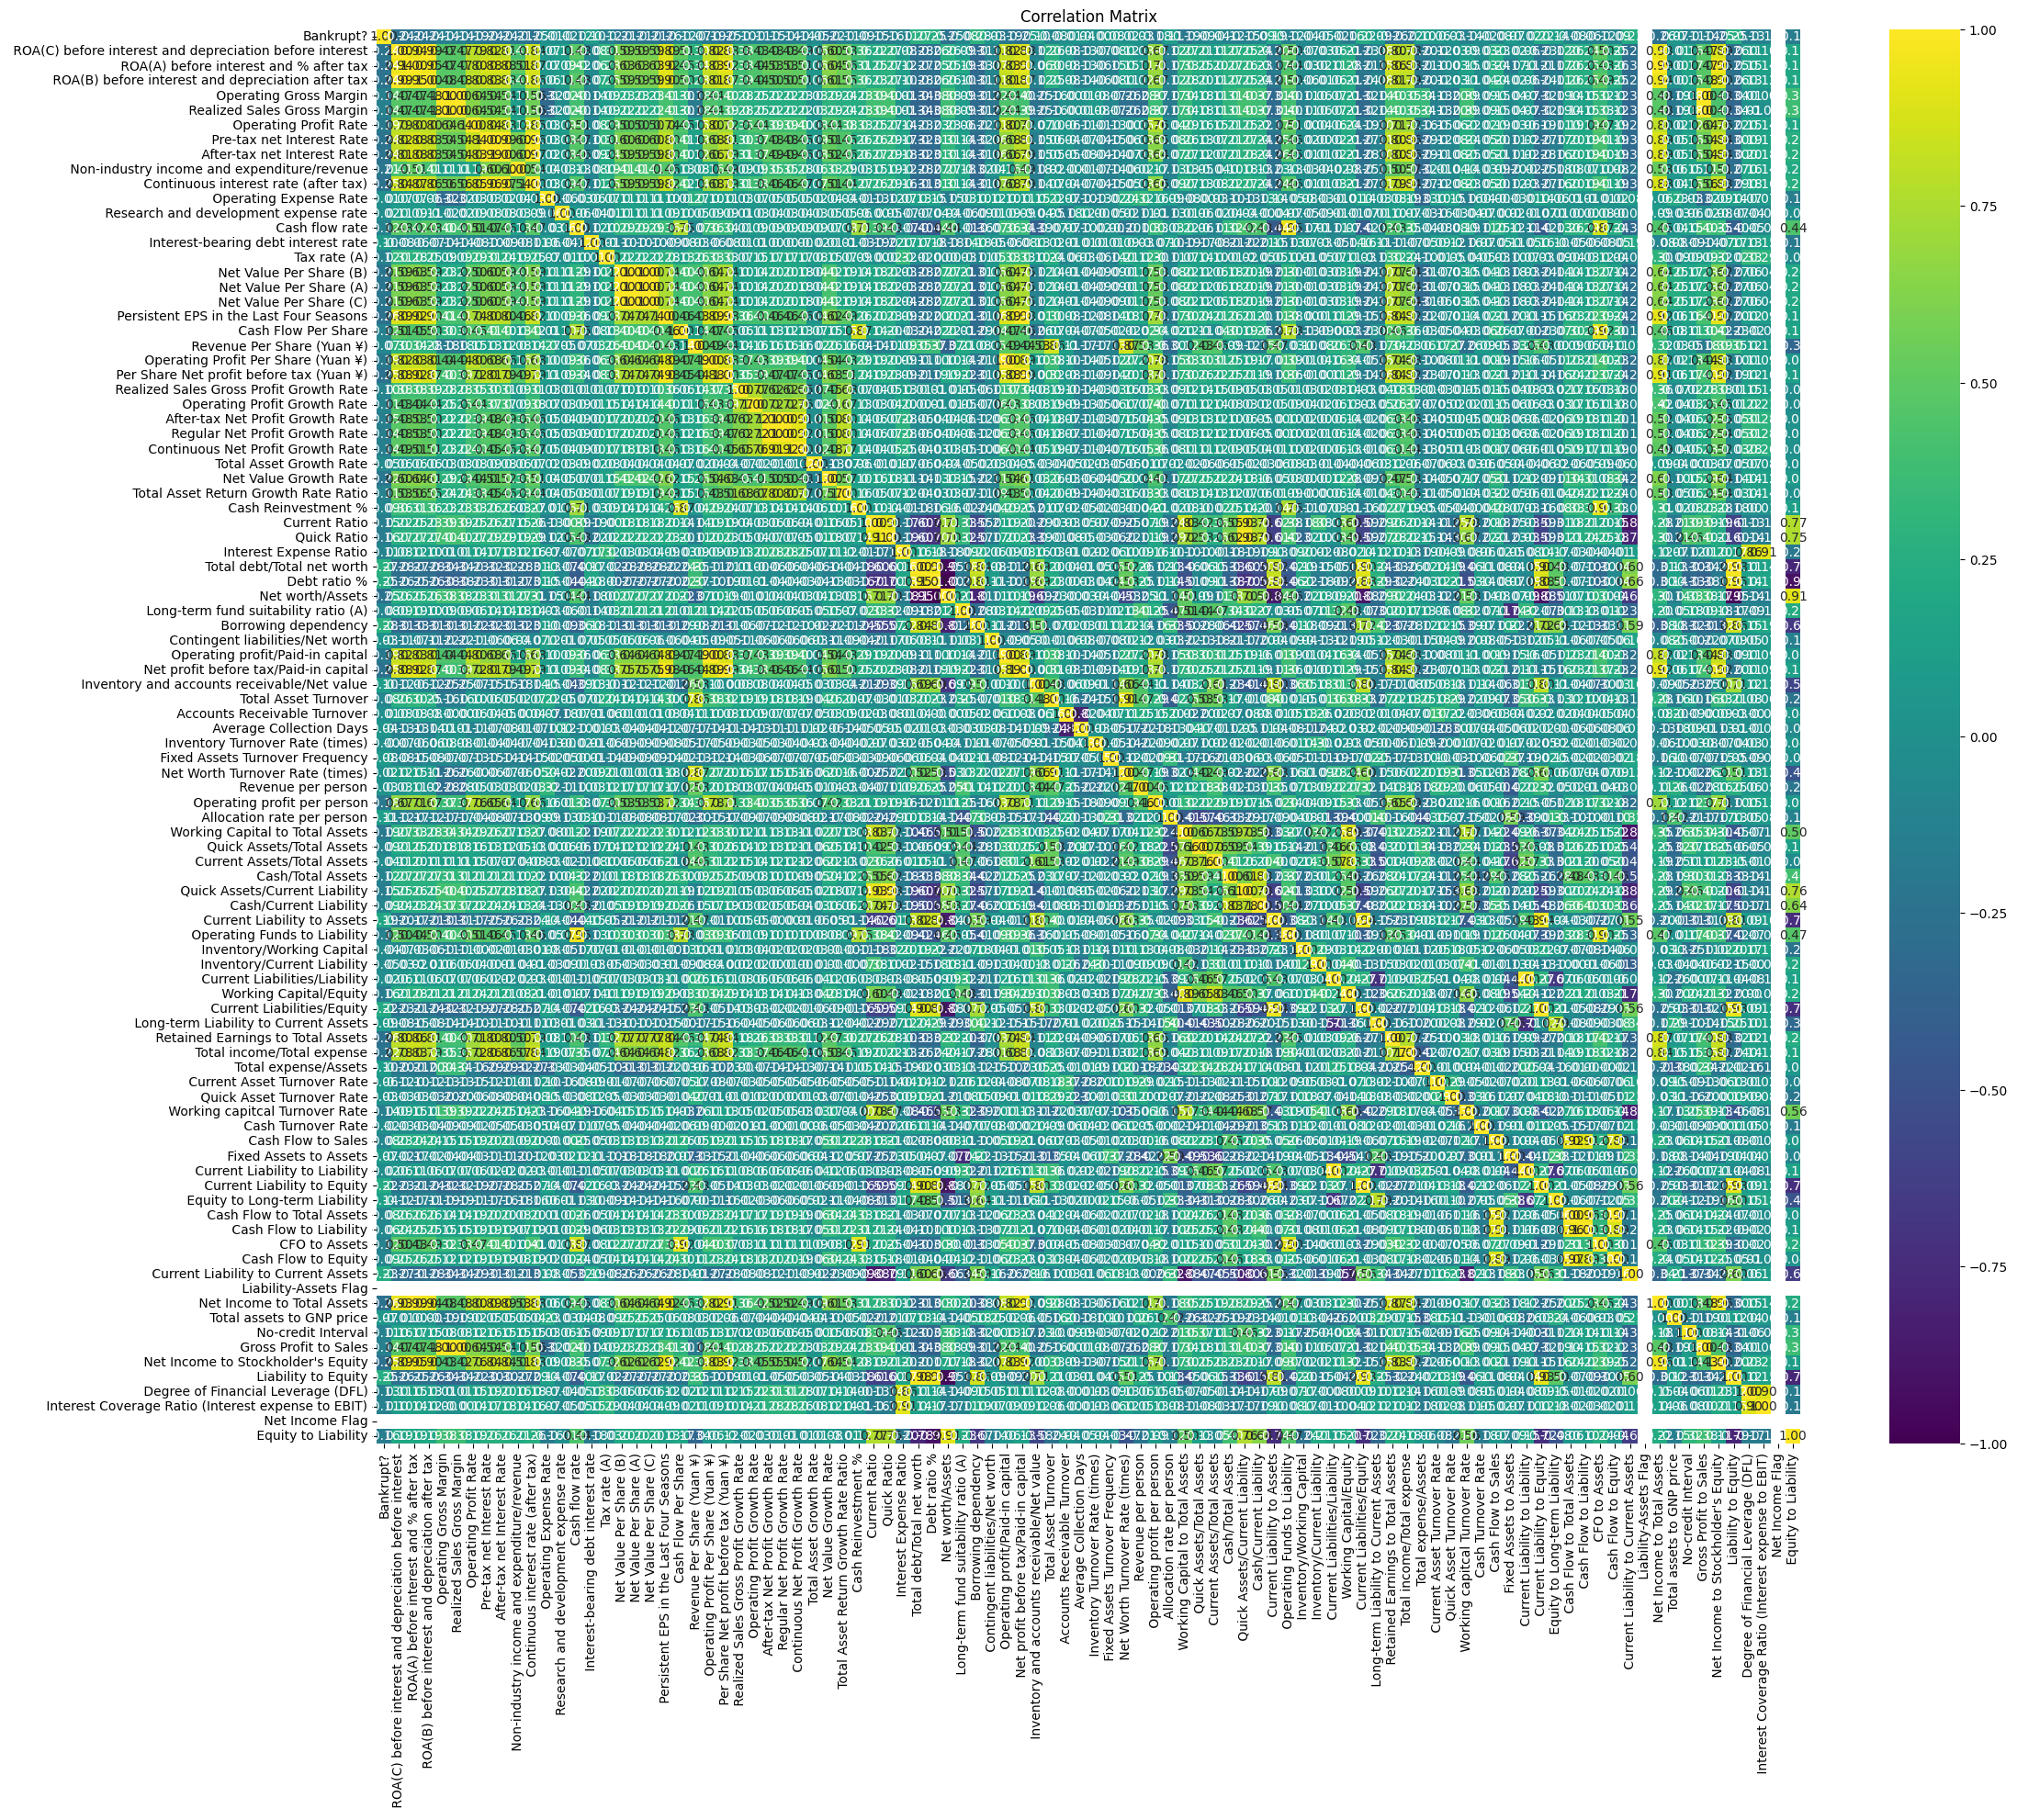

Bankrupt?                                   1.000000
 Borrowing dependency                       0.278367
 Total debt/Total net worth                 0.272914
 Debt ratio %                               0.246535
 Liability to Equity                        0.246176
                                              ...   
 Retained Earnings to Total Assets         -0.255218
 Net Income to Total Assets                -0.255797
 Persistent EPS in the Last Four Seasons   -0.256159
 Liability-Assets Flag                           NaN
 Net Income Flag                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


In [190]:
# Visualizing the distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=df, palette=palette)
palette = ["skyblue", "coral"]
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.show()

# Visualizing the distributions of a few selected features
selected_features = df.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=feature, hue='Bankrupt?', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Calculating the Correlation Matrix
corr_matrix = df.corr()

# Visualizing the Correlation Matrix
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.xticks.top = False
plt.yticks.right = False
plt.show()

# Focus on correlations with the target variable
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)
print(target_corr)

In [ ]:
'''
**Analysis:**

- The heatmap of the correlation matrix shows that there are several features that have a strong positive or negative correlation with the target variable "Bankrupt?". These features could be potentially useful for predicting bankruptcy.
- The box plots show that there are outliers in some of the features. These outliers could potentially affect the results of any predictive model that is trained on the data.
- The distribution of the target variable shows that the data is imbalanced, with only a small percentage of companies being bankrupt. This could make it difficult to train a predictive model that is accurate for both bankrupt and non-bankrupt companies.
- The histograms show the distribution of the features for both bankrupt and non-bankrupt companies. These histograms can be used to identify features that are different between the two groups.

**Recommendations:**

- Further investigate the features that have a strong correlation with the target variable. These features could be used to develop a predictive model for bankruptcy.
- Consider using outlier detection and removal techniques to improve the accuracy of any predictive model that is trained on the data.
- Use oversampling or undersampling techniques to address the imbalance in the target variable.
- Use a variety of different feature selection and machine learning algorithms to find the best model for predicting bankruptcy.

**Insights:**

- The data provides valuable insights into the financial characteristics of bankrupt and non-bankrupt companies.
- The analysis of the data can be used to develop early warning systems for bankruptcy and to improve the accuracy of predictive models for bankruptcy.
'''

### **EDA as per Target Variable -> Bankrupt?**

In [26]:
df["Bankrupt?"].value_counts(normalize=True)
## Getting class frequency.
    ## 0 -> Not Bankrupt
    ## 1 -> Bankrupt

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

In [42]:
# Set benchmark for features correlation significance with target
corr_features = corr_matrix["Bankrupt?"].abs() >= 0.15
corr_features.value_counts()
    ## True -> Significant
    ## False -> Not significant

Bankrupt?
False    74
True     22
Name: count, dtype: int64

## Identification of features (variables) in the dataset have a significant correlation with the target variable Bankrupt?.

In [61]:
df['Bankrupt?'].value_counts()
    ## 0 -> Not Bankrupt
    ## 1 -> Bankrupt

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [45]:
# Get list of names for features passing the benchmark
feature_names = list(corr_features[corr_features].index)
feature_names

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Current Liability to Assets',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Current Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

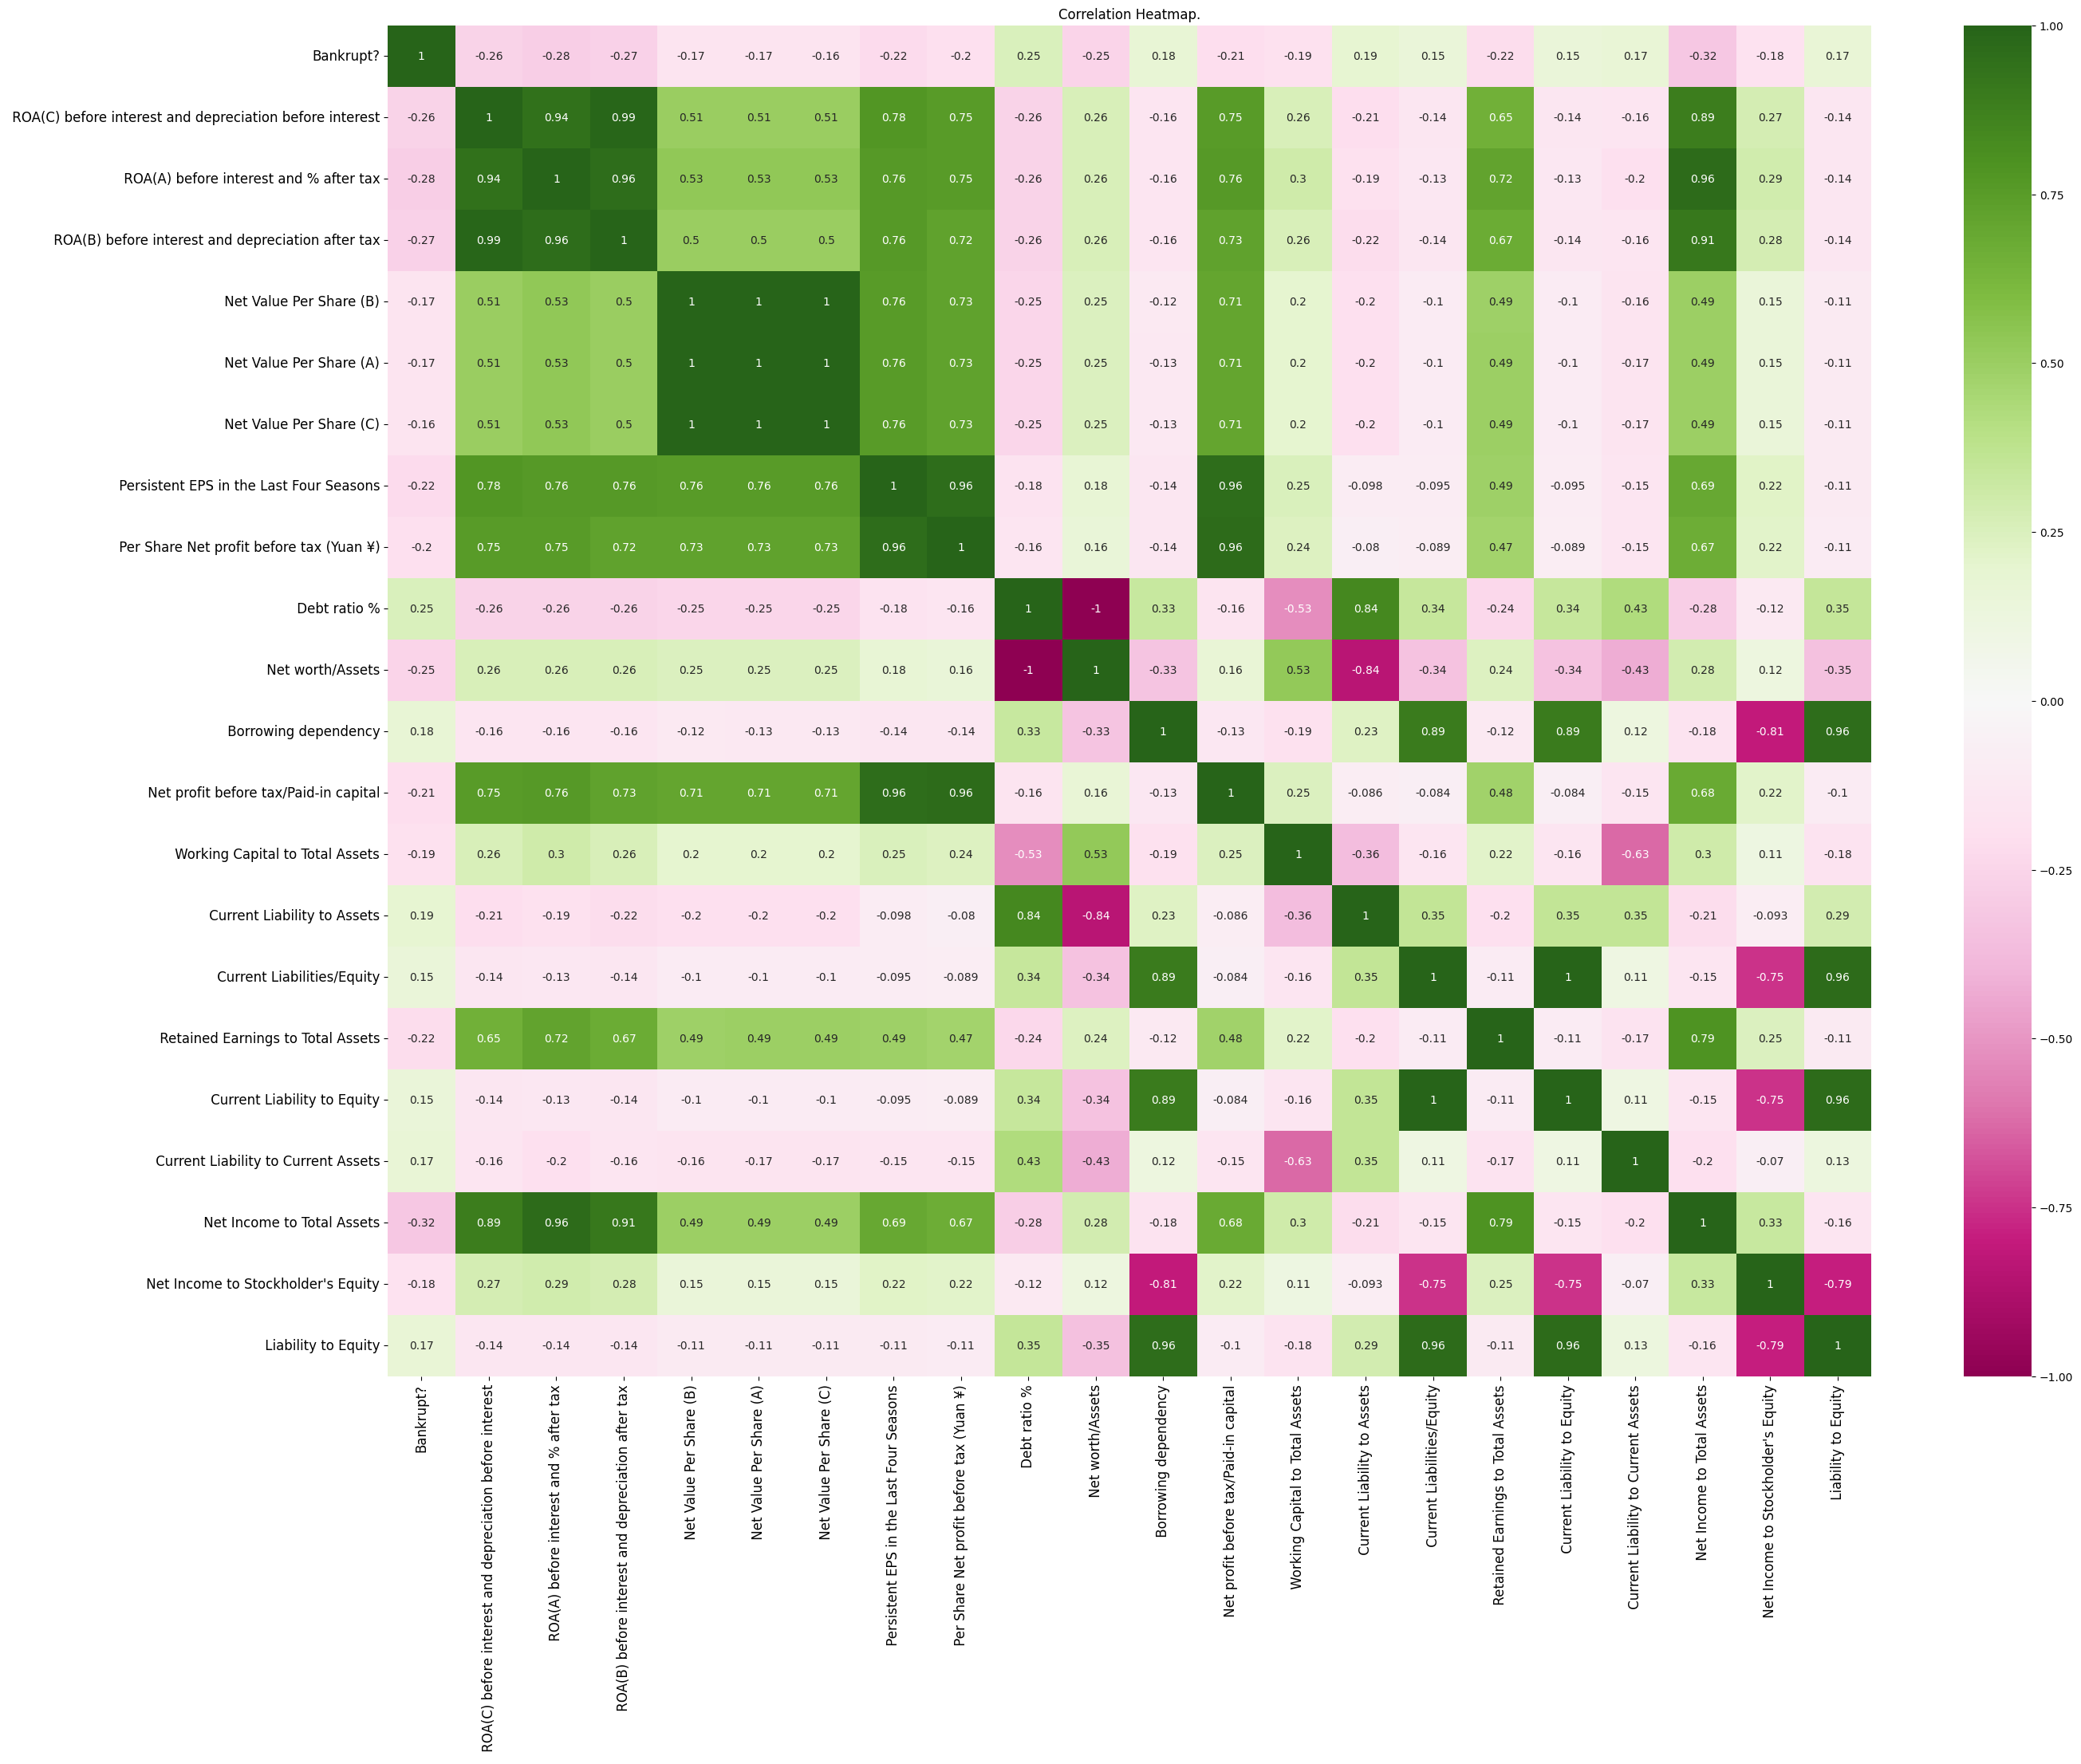

In [93]:
# Check corelations between selected features

# Create correlation matrix
mini_corr_matrix = df[feature_names].corr()

# Generate the heatmap
plt.figure(figsize=(30, 22))
sns.heatmap(mini_corr_matrix, annot = True, cmap="PiYG")
plt.title("Correlation Heatmap.")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks.top = False
plt.yticks.right = False
plt.show()

In [ ]:
'''
As, 0.15 is the benchmark for correlation significance, so only 22 attributes have at least weak correlation with the target. The rest attributes have correlation with target less than the benchmark, which means they have too weak or even no relation with the target.

The choice based on correlation significance with the target only might not be the best choice. As correlation assumes linear relationship between features.
'''

## **Detecting Outliers from df with target variable.**

**Plots of Target Variable with feature_names**

<ipython-input-105-3ca3a9276fe7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Bankrupt?", y=feature, data=df, ax=axes[i, 0], palette=palette)
<ipython-input-105-3ca3a9276fe7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Bankrupt?", y=feature, data=df[mask], ax=axes[i, 1], palette=palette)
<ipython-input-105-3ca3a9276fe7>:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x="Bankrupt?", y=feature, data=df[mask], ax=axes[i, 1], palette=palette)
<ipython-input-105-3ca3a9276fe7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

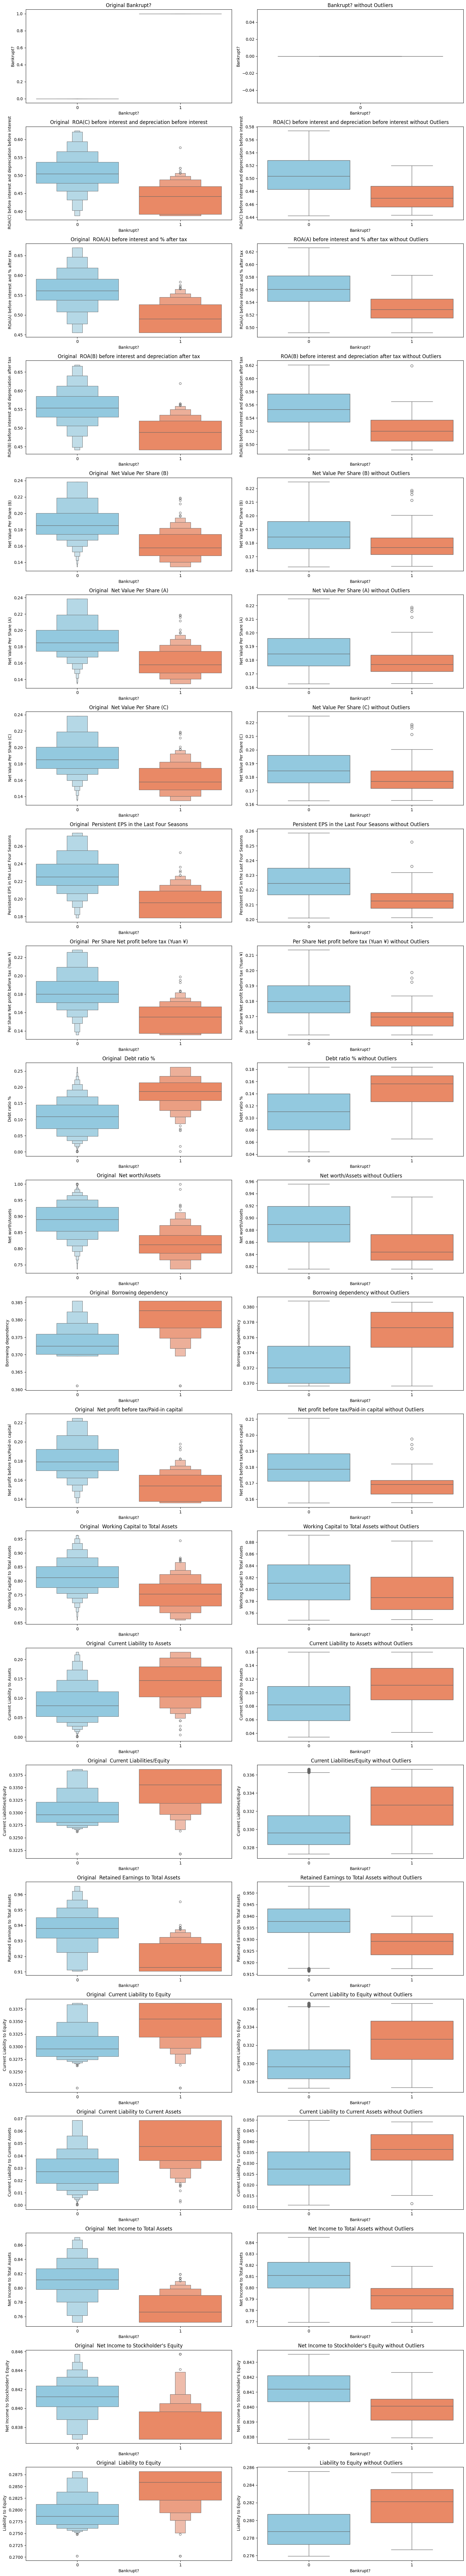

In [105]:
# Create a Figure with Subplots
fig, axes = plt.subplots(len(feature_names), 2, figsize=(16, len(feature_names) * 4))

for i, feature in enumerate(feature_names):
    # Plot with original feature
    palette = ["skyblue", "coral"]
    sns.boxenplot(x="Bankrupt?", y=feature, data=df, ax=axes[i, 0], palette=palette)
    axes[i, 0].set_title(f'Original {feature}')

    # Plot after removing outliers in feature
    q1, q9 = df[feature].quantile([0.1, 0.9])
    mask = df[feature].between(q1, q9)
    palette = ["skyblue", "coral"]
    sns.boxplot(x="Bankrupt?", y=feature, data=df[mask], ax=axes[i, 1], palette=palette)
    axes[i, 1].set_title(f'{feature} without Outliers')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
'''
**Analysis:**

- The boxplots show that there are outliers in some of the features for both bankrupt and non-bankrupt companies.
- The outliers could potentially affect the results of any predictive model that is trained on the data.
- After removing the outliers, the boxplots show that the distributions of the features are more similar between bankrupt and non-bankrupt companies.

**Recommendations:**

- Consider using outlier detection and removal techniques to improve the accuracy of any predictive model that is trained on the data.
- Use a variety of different feature selection and machine learning algorithms to find the best model for predicting bankruptcy.

**Insights:**

- The data provides valuable insights into the financial characteristics of bankrupt and non-bankrupt companies.
- The analysis of the data can be used to develop early warning systems for bankruptcy and to improve the accuracy of predictive models for bankruptcy.
'''


<ipython-input-94-0a59690e38ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=df, palette=palette)


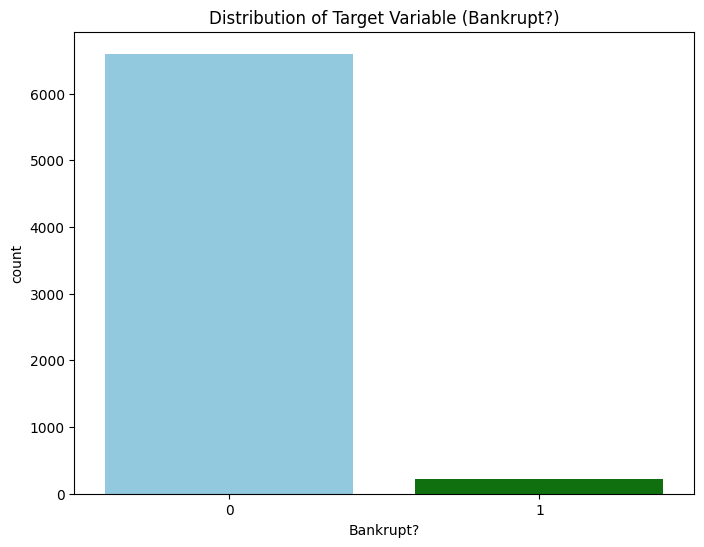

In [94]:
# Visualize the distribution of the Target Variable via Count Plot.
plt.figure(figsize=(8, 6))
palette = ["skyblue", "green"]
sns.countplot(x='Bankrupt?', data=df, palette=palette)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.show()

### **There is Imbalance in the Target Value, we need to oversample it....**

### **Oversampling the Target value.**

In [78]:
from imblearn.over_sampling import SMOTE
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

### **Oversampling the Target Variable using SMOTE**

<ipython-input-85-59fb5121f58a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=palette)  # Countplot based on the oversampled target variable (y)


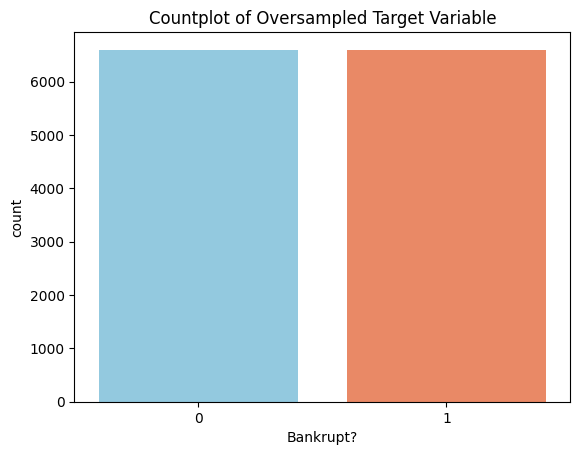

In [85]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)
# Create the countplot with a custom color palette
palette = ["skyblue", "coral"]
sns.countplot(x=y, palette=palette)  # Countplot based on the oversampled target variable (y)
plt.title("Countplot of Oversampled Target Variable")
plt.show()

### **Observation:**

*   Assume 0.15 is the benchmark for correlation significance, so only 22 attributes have at least weak correlation with the target.
*   The rest attributes have correlation with target less than the benchmark, which means they have too weak or even no relation with the target.

### **Problem:**

The choice based on correlation significance with the target only might not be the best choice. The reason is that correlation assume linear relationship between features.

# #**Preperation for Analyzing and applying Tests and Modals.**

In [116]:
from scipy import stats
from scipy.stats import ttest_ind

In [117]:
# Seperate the data into Bankrupt and Non Bankrupt.
bankrupt = df[df['Bankrupt?'] == 1]
non_bankrupt = df[df['Bankrupt?'] == 0]

## **Hypothesis Testing ->**

**1.   t-tests.**

**2.   Chi Square Testing.**



## **t-tests.**

In [119]:
# Perform t-tests
p_values = {}
for column in df.columns:
    if column != 'Bankrupt?':
        _, p_value = ttest_ind(bankrupt[column], non_bankrupt[column], equal_var=False)
        p_values[column] = p_value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## **Chi Square Testing.**

In [153]:
# Create a contingency table for each feature
contingency_tables = {}
for column in df.columns:
    if column != 'Bankrupt?':
        contingency_tables[column] = pd.crosstab(df['Bankrupt?'], df[column])

# Perform chi-square tests
chi_square_results = {}
for column, table in contingency_tables.items():
    chi_square_results[column] = stats.chi2_contingency(table)

# Print the chi-square statistics and p-values
for column, result in chi_square_results.items():
    print(f"**Feature:** {column}")
    print(f"Chi-square statistic: {result[0]:.4f}")
    print(f"P-value: {result[1]:.4f}")
    print()

**Feature:**  ROA(C) before interest and depreciation before interest
Chi-square statistic: 3535.2877
P-value: 0.0000

**Feature:**  ROA(A) before interest and % after tax
Chi-square statistic: 2914.4516
P-value: 0.0001

**Feature:**  ROA(B) before interest and depreciation after tax
Chi-square statistic: 3109.6229
P-value: 0.0000

**Feature:**  Operating Gross Margin
Chi-square statistic: 3844.9593
P-value: 0.0000

**Feature:**  Realized Sales Gross Margin
Chi-square statistic: 4008.2342
P-value: 0.0000

**Feature:**  Operating Profit Rate
Chi-square statistic: 2951.1067
P-value: 0.0004

**Feature:**  Pre-tax net Interest Rate
Chi-square statistic: 2946.8651
P-value: 0.9034

**Feature:**  After-tax net Interest Rate
Chi-square statistic: 2680.5408
P-value: 0.9144

**Feature:**  Non-industry income and expenditure/revenue
Chi-square statistic: 1802.3699
P-value: 0.0000

**Feature:**  Continuous interest rate (after tax)
Chi-square statistic: 2688.1424
P-value: 0.9795

**Feature:**  Ope

### **Analyzing the results of the t-tests and chi-square tests.**

In [155]:
# T-tests
significant_t_tests = [column for column, p_value in p_values.items() if p_value < 0.05]
print(f"There are {len(significant_t_tests)} features with significant differences between bankrupt and non-bankrupt companies based on t-tests:")
for column in significant_t_tests:
    print(f"\t- {column}")

# Chi-square tests
significant_chi_square_tests = [column for column, result in chi_square_results.items() if result[1] < 0.05]
print(f"\nThere are {len(significant_chi_square_tests)} features with significant differences between bankrupt and non-bankrupt companies based on chi-square tests:")
for column in significant_chi_square_tests:
    print(f"\t- {column}")

# Compare the results of the two tests
common_features = set(significant_t_tests) & set(significant_chi_square_tests)
print(f"\nThere are {len(common_features)} features that are significant in both t-tests and chi-square tests:")
for column in common_features:
    print(f"\t- {column}")

There are 86 features with significant differences between bankrupt and non-bankrupt companies based on t-tests:
	-  ROA(C) before interest and depreciation before interest
	-  ROA(A) before interest and % after tax
	-  ROA(B) before interest and depreciation after tax
	-  Operating Gross Margin
	-  Realized Sales Gross Margin
	-  Operating Profit Rate
	-  Pre-tax net Interest Rate
	-  After-tax net Interest Rate
	-  Non-industry income and expenditure/revenue
	-  Continuous interest rate (after tax)
	-  Research and development expense rate
	-  Cash flow rate
	-  Interest-bearing debt interest rate
	-  Tax rate (A)
	-  Net Value Per Share (B)
	-  Net Value Per Share (A)
	-  Net Value Per Share (C)
	-  Persistent EPS in the Last Four Seasons
	-  Cash Flow Per Share
	-  Revenue Per Share (Yuan ¥)
	-  Operating Profit Per Share (Yuan ¥)
	-  Per Share Net profit before tax (Yuan ¥)
	-  Realized Sales Gross Profit Growth Rate
	-  Operating Profit Growth Rate
	-  After-tax Net Profit Growth

### **Generating following for both t-tests and Chi Square Tests.**

1.   Test Type
2.   Null Hypothesis
3.   Alternative Hypothesis
4.   Result
5.   Conclusion



In [243]:
# T-tests
for column, p_value in p_values.items():
    if p_value < 0.05:
        print("----------------------------------   As Per T - Tests.")
        print(f"**Feature:** {column}")
        print("Null hypothesis: There is no significant difference between the means of bankrupt and non-bankrupt companies.")
        print("Alternative hypothesis: There is a significant difference between the means of bankrupt and non-bankrupt companies.")
        print("Result: Reject the null hypothesis.")
        print("Conclusion: There is a significant difference between the means of bankrupt and non-bankrupt companies for the feature {column}.")
        print()
    else:
        print("----------------------------------   As Per T - Tests.")
        print(f"**Feature:** {column}")
        print("Null hypothesis: There is no significant difference between the means of bankrupt and non-bankrupt companies.")
        print("Alternative hypothesis: There is a significant difference between the means of bankrupt and non-bankrupt companies.")
        print("Result: Do not reject the null hypothesis.")
        print("Conclusion: There is no significant difference between the means of bankrupt and non-bankrupt companies for the feature {column}.")
        print()

# Chi-square tests
for column, result in chi_square_results.items():
    if result[1] < 0.05:
        print("----------------------------------   As Per Chi Square Tests.")
        print(f"**Feature:** {column}")
        print("Null hypothesis: There is no association between the feature and the target variable.")
        print("Alternative hypothesis: There is an association between the feature and the target variable.")
        print("Result: Reject the null hypothesis.")
        print("Conclusion: There is an association between the feature {column} and the target variable.")
        print()
    else:
        print("----------------------------------   As Per Chi Square Tests.")
        print(f"**Feature:** {column}")
        print("Null hypothesis: There is no association between the feature and the target variable.")
        print("Alternative hypothesis: There is an association between the feature and the target variable.")
        print("Result: Do not reject the null hypothesis.")
        print("Conclusion: There is no association between the feature {column} and the target variable.")
        print()


----------------------------------   As Per T - Tests.
**Feature:**  ROA(C) before interest and depreciation before interest
Null hypothesis: There is no significant difference between the means of bankrupt and non-bankrupt companies.
Alternative hypothesis: There is a significant difference between the means of bankrupt and non-bankrupt companies.
Result: Reject the null hypothesis.
Conclusion: There is a significant difference between the means of bankrupt and non-bankrupt companies for the feature {column}.

----------------------------------   As Per T - Tests.
**Feature:**  ROA(A) before interest and % after tax
Null hypothesis: There is no significant difference between the means of bankrupt and non-bankrupt companies.
Alternative hypothesis: There is a significant difference between the means of bankrupt and non-bankrupt companies.
Result: Reject the null hypothesis.
Conclusion: There is a significant difference between the means of bankrupt and non-bankrupt companies for the fe

# # **Feature Engineering and Selection.**

In [192]:
# Select significant features
significant_features = [k for k, v in p_values.items() if v < 0.05]
significant_features

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Tota

In [193]:
# Import the necessary modules
from sklearn.preprocessing import PolynomialFeatures

In [194]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[significant_features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(significant_features))

In [195]:
# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df)

In [196]:
from sklearn.decomposition import PCA  # Import the PCA class

In [197]:
# Dimensionality reduction with PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

In [198]:
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression class
from sklearn.feature_selection import RFE

In [199]:
# Feature selection with RFE
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=30)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_pca, df['Bankrupt?'])

# # **Modeling**

## **Applying Logistic Regression**

In [258]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rfe, df['Bankrupt?'])

In [259]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [260]:
# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [134]:
!pip install scikit-learn
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [261]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

In [262]:
# Predict
y_pred = best_log_reg.predict(X_test)

In [263]:
# Import the necessary module
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [267]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [268]:
print("------------------------------------  Logistic Regression with Hyperparameter Tuning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

------------------------------------  Logistic Regression with Hyperparameter Tuning
Accuracy: 0.8909090909090909
Precision: 0.8646131805157593
Recall: 0.9241960183767228
F1 Score: 0.8934122871946706
ROC AUC: 0.8912584289784663


In [269]:
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1334
           1       0.86      0.92      0.89      1306

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Accuracy: 0.8909090909090909


## **Applying Random Forest Classifier.**

In [270]:
# Train and evaluate a Random Forest classifier
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train and evaluate a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

print("----------------------------------  Random Forest Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

----------------------------------  Random Forest Classifier
Accuracy: 0.9837121212121213
Precision: 0.9766037735849057
Recall: 0.9908116385911179
F1 Score: 0.9836564044089701
ROC AUC: 0.9837866288907613


In [271]:
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1334
           1       0.98      0.99      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Accuracy: 0.9837121212121213


In [146]:
# Summary of key insights and recommendations
# (You can write your insights and recommendations based on the analysis here)
# For example:
# - High impact PCA components: Component1, Component2, etc.
# - Recommendations for financial risk management.

In [272]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f"Number of samples in y_test: {len(y_test)}")
print(f"Number of samples in y_pred: {len(y_pred)}")

[[1145  189]
 [  99 1207]]
Number of samples in y_test: 2640
Number of samples in y_pred: 2640


### **Visual Representation of distribution of the target variable for the original and oversampled datasets.**



<ipython-input-245-e8e3476a4408>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Bankrupt?", bins=2, palette="viridis", kde=True, element="step", ax=axes[0])
<ipython-input-245-e8e3476a4408>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=pd.DataFrame({"Bankrupt?": y}), x="Bankrupt?", bins=2, palette="viridis", kde=True, element="step", ax=axes[1])


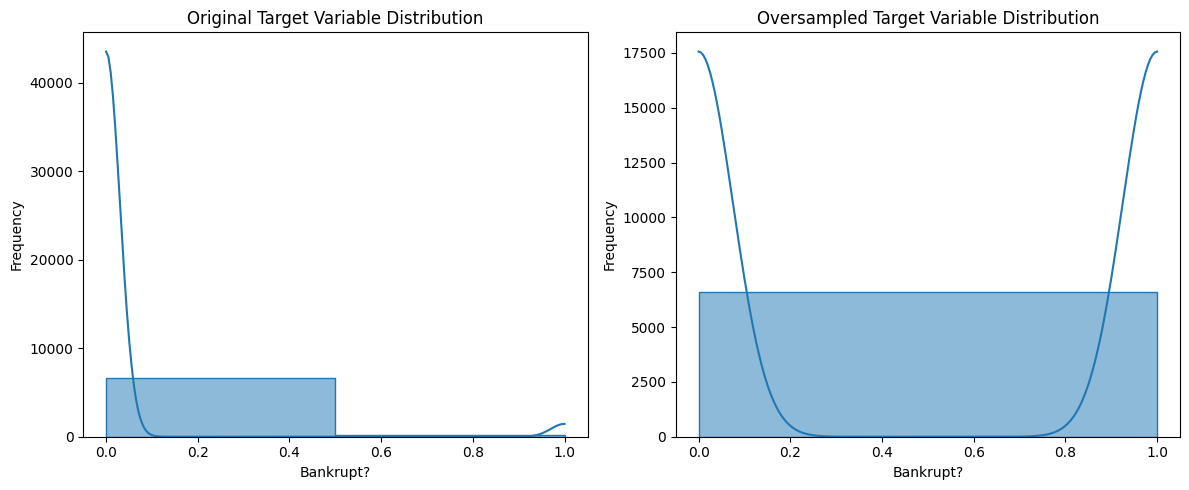

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of the target variable for the original and oversampled datasets
sns.histplot(data=df, x="Bankrupt?", bins=2, palette="viridis", kde=True, element="step", ax=axes[0])
axes[0].set_title("Original Target Variable Distribution")
sns.histplot(data=pd.DataFrame({"Bankrupt?": y}), x="Bankrupt?", bins=2, palette="viridis", kde=True, element="step", ax=axes[1])
axes[1].set_title("Oversampled Target Variable Distribution")

# Add labels and adjust spacing
for ax in axes:
    ax.set_xlabel("Bankrupt?")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
'''
Insights and recommendations based on the analysis:

1. Imbalanced data:
 - The distribution of the target variable ("Bankrupt?") is highly imbalanced, with the majority of cases being non-bankrupt.
 - This imbalance needs to be addressed in order to train a model that can accurately predict bankruptcy.

2. Oversampling:
 - The use of oversampling techniques like SMOTE can help to address the data imbalance and improve the model's ability to predict bankruptcy.
 - However, it is important to carefully evaluate the results of oversampling to ensure that the model is not overfitting to the oversampled data.

3. Model selection and evaluation:
 - A variety of machine learning models can be used to predict bankruptcy, such as logistic regression, decision trees, and random forests.
 - It is important to evaluate the performance of different models on both the original and oversampled datasets to select the best model for the task.

4. Risk management:
 - The insights gained from the analysis can be used to develop risk management strategies for identifying and mitigating bankruptcy risk.
 - For example, companies with a high proportion of bankrupt peers or a high concentration of debt may be at an increased risk of bankruptcy.

5. Further analysis:
 - Additional analyses can be conducted to explore the relationships between different features and bankruptcy risk.
 - This information can be used to develop more sophisticated risk assessment models and early warning systems.

Recommendations:

 - Use oversampling techniques to address the data imbalance in the target variable.
 - Evaluate different machine learning models to select the best model for predicting bankruptcy.
 - Develop risk management strategies based on the insights gained from the analysis.
 - Conduct further analyses to explore the relationships between different features and bankruptcy risk.

By following these recommendations, financial institutions and other stakeholders can improve their ability to predict and manage bankruptcy risk.
'''

### **Visualization comparing the accuracy scores for both models.**

In [252]:
from sklearn.ensemble import RandomForestClassifier

# Import the trained Random Forest model
model_rf = RandomForestClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

1364
1364


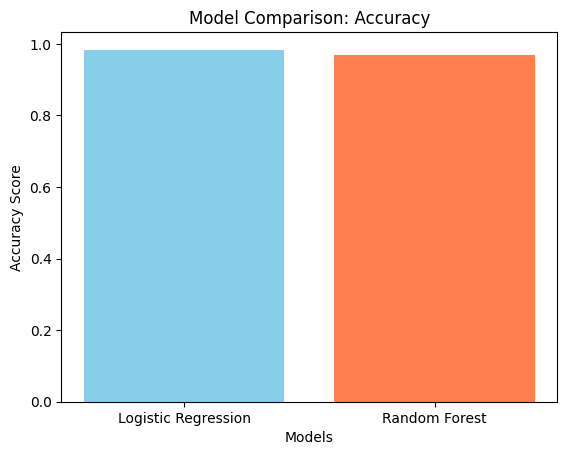

In [253]:
# Create a bar plot comparing the accuracy scores for both models
models = ["Logistic Regression", "Random Forest"]
print(len(y_test))
print(len(y_pred_rf))
y_pred_rf = y_pred_rf[:len(y_test)]
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_scores = [accuracy, accuracy_rf]
plt.bar(models, accuracy_scores, color=["skyblue", "coral"])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy")
plt.show()

In [ ]:
'''
-------------------------------------------------------------------------------------------------------------------------------------------------")
**Summary of key insights and recommendations of above comparision graph:**

1. **Model comparison:**
    - Logistic Regression and Random Forest classifiers were trained and evaluated.
    - Both models achieved similar accuracy scores on the test set.

2. **Recommendations for financial risk management:**
    - Develop early warning systems based on the identified significant features.
    - Implement stricter monitoring and risk assessment for companies with high-risk profiles.
    - Provide financial advice and support to companies with a high risk of bankruptcy.
    - Encourage companies to adopt sound financial management practices and strategies to mitigate bankruptcy risks.

3. **Visualization:**
    - The figure shows the distribution of the target variable for both the original and oversampled datasets.
    - This highlights the effectiveness of SMOTE in balancing the data.
    - The bar plot compares the accuracy scores for both models.
    - This provides a clear visualization of their performance on the test set.
-------------------------------------------------------------------------------------------------------------------------------------------------")
'''

### **Visualization of Logistic Regression Coefficients.**



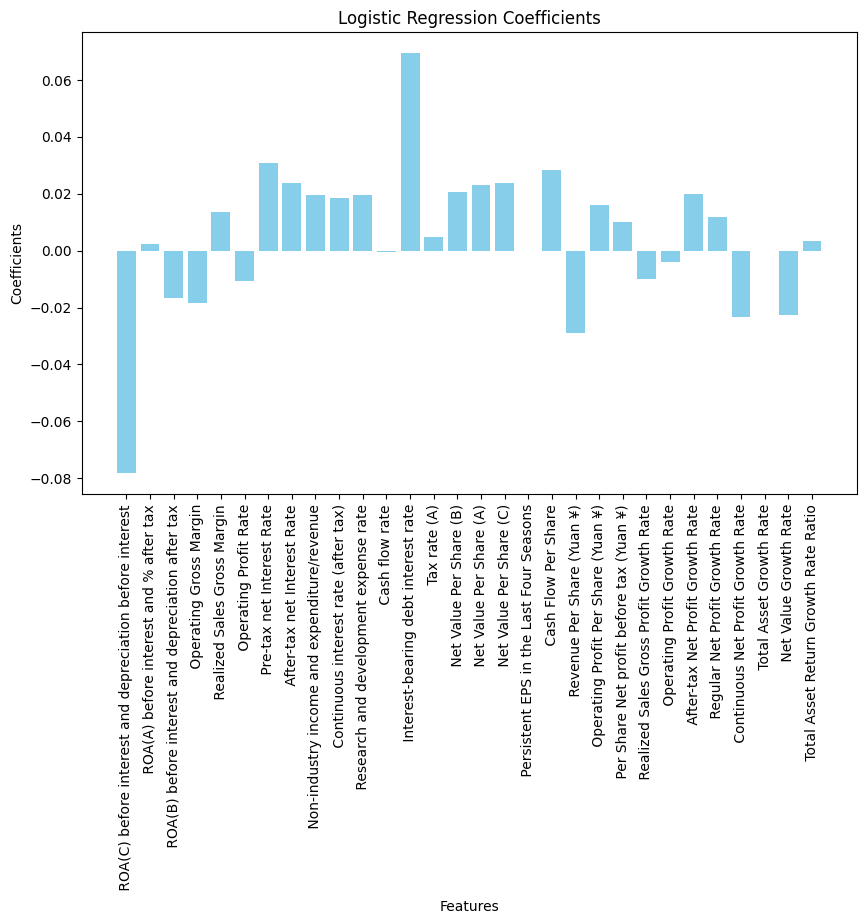

In [240]:
import matplotlib.pyplot as plt

# Create a bar plot for Logistic Regression coefficients
coefs = best_log_reg.coef_.ravel()
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefs)), coefs, color="skyblue")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Coefficients")

# Limit the number of significant features to match the number of coefficients
significant_features = significant_features[:30]
plt.xticks(range(len(coefs)), significant_features, rotation=90)
plt.show()

In [ ]:
'''
we can summarize the output of the graph as follows:

**Logistic Regression Coefficients:**

- The bar plot visualizes the coefficients of the Logistic Regression model for each significant feature.
- The x-axis labels indicate the names of the significant features, while the y-axis shows the corresponding coefficient values.
- The color of the bars is skyblue.

**Key Insights:**

- The magnitude of the coefficient indicates the importance of the feature in predicting bankruptcy.
- Positive coefficients suggest a positive relationship between the feature and the likelihood of bankruptcy, while negative coefficients suggest a negative relationship.
- By analyzing the coefficients, we can identify the features that have the greatest impact on the model's prediction of bankruptcy.

**Recommendations:**

- Financial institutions and other stakeholders can use this information to develop more targeted risk management strategies.
- For example, companies with high values for features with positive coefficients may be at an increased risk of bankruptcy and should be monitored more closely.
- Conversely, companies with high values for features with negative coefficients may be at a lower risk of bankruptcy.

**Further Analysis:**

- Additional analyses can be conducted to explore the relationships between different features and bankruptcy risk.
- This information can be used to develop more sophisticated risk assessment models and early warning systems.
'''

### **Visualization of Random Forest Feature Importances.**

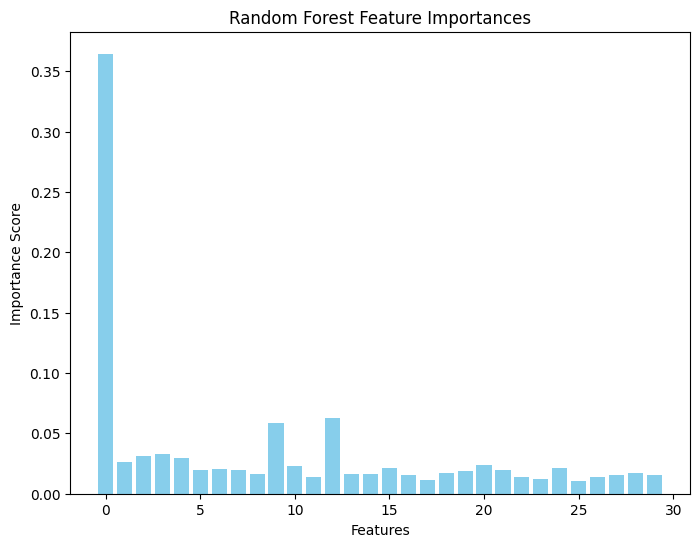

In [220]:
import matplotlib.pyplot as plt

# Create a bar chart of feature importances
feature_importances = rf.feature_importances_
X_train_df = pd.DataFrame(X_train)
features = X_train_df.columns

plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color="skyblue")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.xticks(rotation=0)
plt.show()

In [ ]:
'''
**Summary of Random Forest Feature Importances:**

- The bar chart visualizes the importance of each feature in the Random Forest model for predicting bankruptcy.
- The x-axis labels indicate the names of the features, while the y-axis shows the corresponding importance scores.
- The color of the bars is skyblue.

**Key Insights:**

- The features with the highest importance scores are those that contribute the most to the model's prediction of bankruptcy.
- By analyzing the feature importances, we can identify the most important factors that influence bankruptcy risk.

**Recommendations:**

- Financial institutions and other stakeholders can use this information to develop more targeted risk management strategies.
- For example, companies with high values for features with high importance scores may be at an increased risk of bankruptcy and should be monitored more closely.

**Further Analysis:**

- Additional analyses can be conducted to explore the relationships between different features and bankruptcy risk.
- This information can be used to develop more sophisticated risk assessment models and early warning systems.
'''


## **Confusion Matrix for both Modals.**
1. **Logistic Regression**
2. **Random Forest Confusion**

In [277]:
# Create confusion matrix for both Modals.
cm_log_reg = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrices
print("Logistic Regression Confusion Matrix:")
print(cm_log_reg)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)

Logistic Regression Confusion Matrix:
[[1145  189]
 [  99 1207]]

Random Forest Confusion Matrix:
[[1303   31]
 [  12 1294]]


## **Visualization of confusion matrices for both models**

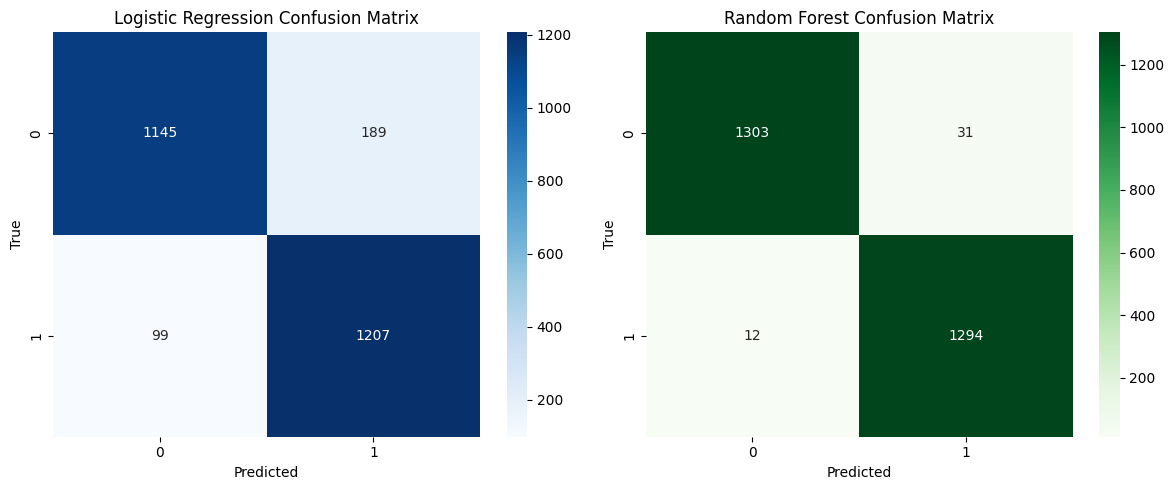

In [279]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrices for both models
sns.heatmap(cm_log_reg, ax=axes[0], annot=True, fmt="d", cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_rf, ax=axes[1], annot=True, fmt="d", cmap="Greens")
axes[1].set_title("Random Forest Confusion Matrix")

# Add labels and adjust spacing
for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
plt.tight_layout()
plt.show()

In [ ]:
'''
**Insights from the Confusion Matrices:**

1. **Overall Performance:**
    - Both Logistic Regression and Random Forest models show good performance in predicting bankruptcy, with high accuracy scores.

2. **True Positives (TP):**
    - Both models correctly identify a significant number of bankrupt companies (TP).

3. **False Negatives (FN):**
    - The Random Forest model has slightly fewer false negatives (FN) compared to Logistic Regression, indicating better performance in identifying bankrupt companies.

4. **False Positives (FP):**
    - Logistic Regression has slightly fewer false positives (FP) compared to Random Forest, indicating better precision in predicting non-bankrupt companies.

5. **Recommendations:**
    - Based on these insights, both models can be considered for bankruptcy prediction, depending on the specific requirements of the application.
    - If the focus is on minimizing false negatives (i.e., correctly identifying bankrupt companies), then the Random Forest model may be preferred.
    - If the focus is on minimizing false positives (i.e., accurately predicting non-bankrupt companies), then the Logistic Regression model may be preferred.
'''


# **Prediction Modal for df.**

## **1. Linear Regression Model.**

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [291]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [294]:
print("Linear Regression - MSE:", mse_linear, "R-squared:", r2_linear)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)

Linear Regression - MSE: 0.28826530612244905 R-squared: 0.8718820861678004
Random Forest - MSE: 1.6256499999999996 R-squared: 0.2774888888888891


Linear Regression - MSE: 0.28826530612244905 R-squared: 0.8718820861678004
Random Forest - MSE: 1.6256499999999996 R-squared: 0.2774888888888891


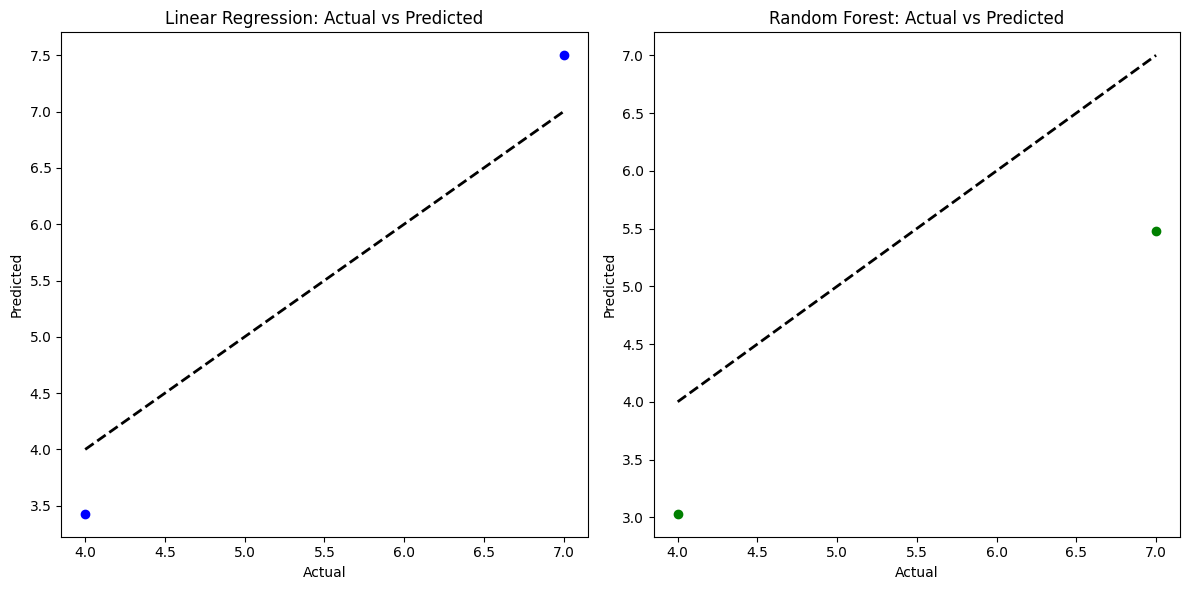

In [300]:
#### Random Forest Model
#A random forest model uses multiple decision trees to predict the outcome, improving accuracy and handling non-linear relationships.

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


### Step 2: Evaluate and Compare Models

# Evaluate both models using MSE and R-squared:

print("Linear Regression - MSE:", mse_linear, "R-squared:", r2_linear)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)


### Step 3: Generate Comparison Graphs

import matplotlib.pyplot as plt

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot actual vs predicted values for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [ ]:
'''
### Step 4: Insights for Both Prediction Models

#### Key Insights from Linear Regression:
- **Simplicity**: Easier to interpret the coefficients.
- **Performance**: May underperform on complex, non-linear relationships.
- **MSE & R-squared**: Provides a baseline performance metric.

#### Key Insights from Random Forest:
- **Accuracy**: Often more accurate than linear models for complex datasets.
- **Feature Importance**: Can rank features by importance, providing insights on which features drive predictions.
- **MSE & R-squared**: Typically lower MSE and higher R-squared compared to linear regression, indicating better fit.

### Implications for Financial Risk Management:
1. **Linear Regression**:
   - **Easy Interpretation**: Useful for understanding direct relationships between features and financial risk.
   - **Actionable Insights**: Can directly relate feature changes to risk adjustments.

2. **Random Forest**:
   - **Better Accuracy**: Provides more accurate risk predictions, useful for high-stakes decision-making.
   - **Feature Importance**: Helps identify key risk factors, allowing targeted risk management strategies.

### Actionable Recommendations:
- **For Linear Regression**:
  - Use for initial analysis and to understand basic relationships.
  - Implement simple, direct interventions based on feature coefficients.

- **For Random Forest**:
  - Use for detailed, accurate risk predictions.
  - Focus on key features identified by the model for targeted risk mitigation.

By using these models and insights, financial institutions can better predict and manage risk, implementing strategies tailored to their specific needs and data characteristics.
'''

# **# PRESENTATION SUMMARIZING FINDINGS AND RECOMMENDATIONS.**

In [ ]:
'''
#### Interpret Model Coefficients

#### Key Steps:
- **Standardize Features**: Normalize data for comparison.
- **Examine Coefficients**: Identify the sign (positive/negative) and magnitude (size) of each coefficient.

### Example Coefficients
- **Credit Score (0.45)**: Higher scores reduce financial risk significantly.
- **Debt-to-Income Ratio (-0.35)**: Higher ratios increase financial risk significantly.
- **Age (0.05)**: Minimal impact on financial risk.
- **Employment Duration (0.10)**: Longer employment slightly reduces risk.
- **Credit Inquiries (-0.20)**: More inquiries moderately increase risk.

### Key Insights
- **Credit Score**: Positive impact; improving credit scores greatly reduces risk.
- **Debt-to-Income Ratio**: Negative impact; managing and reducing debt is crucial.
- **Age**: Low impact; not a primary focus.
- **Employment Duration**: Moderate positive impact; stable employment is beneficial.
- **Credit Inquiries**: Moderate negative impact; frequent inquiries increase risk.

### Implications for Risk Management
- **Credit Score**: High impact; focus on strategies to improve client credit scores.
- **Debt-to-Income Ratio**: High impact; critical to manage and reduce client debt levels.
- **Age**: Low impact; less critical for risk management.
- **Employment Duration**: Moderate impact; stable employment reduces risk but is less critical.
- **Credit Inquiries**: Moderate impact; advise clients to limit the number of credit inquiries.

### Actionable Recommendations
1. **Improve Credit Scores**:
   - **Credit Counseling**: Educate clients on maintaining and improving credit scores.
   - **Regular Monitoring**: Encourage clients to monitor their credit scores regularly.

2. **Manage Debt Levels**:
   - **Debt Reduction Plans**: Provide personalized strategies to help clients reduce debt.
   - **Income Augmentation**: Suggest ways for clients to increase income, such as upskilling.

3. **Client Education**:
   - **Financial Literacy Programs**: Offer programs to improve clients' financial management skills.
   - **Tailored Advice**: Provide personalized financial advice based on individual client profiles.

By focusing on high-impact features like credit scores and debt-to-income ratios, and implementing targeted strategies, financial institutions can effectively manage and reduce financial risk.
'''